<a href="https://colab.research.google.com/github/sumankmaiti/All-in-one/blob/main/vgg19_flatten_layer_neuron_activation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# visualize feature maps output from each block in the vgg model
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot as plt
from numpy import expand_dims

In [ ]:
!pip install cleverhans

     |████████████████████████████████| 92 kB 157 kB/s 
     |████████████████████████████████| 154 kB 29.3 MB/s 
     |████████████████████████████████| 42 kB 908 kB/s 


In [ ]:
from absl import app, flags
from easydict import EasyDict
import  numpy  as  np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from google.colab.patches import cv2_imshow
import cv2
import matplotlib.pyplot as plt

from cleverhans.torch.attacks.fast_gradient_method import fast_gradient_method
from cleverhans.torch.attacks.projected_gradient_descent import (
    projected_gradient_descent,
)

class CNN(torch.nn.Module):
    """Basic CNN architecture."""

    def __init__(self, in_channels=1):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, 64, 8, 1)
        self.conv2 = nn.Conv2d(64, 128, 6, 2)
        self.conv3 = nn.Conv2d(128, 128, 5, 2)
        self.fc = nn.Linear(128 * 3 * 3, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = x.view(-1, 128 * 3 * 3)
        x = self.fc(x)
        return x


# def  ld_cifar10 ():
#     """Load training and test data."""
#     train_transforms = torchvision.transforms.Compose(
#         [torchvision.transforms.ToTensor()]
#     )
#     test_transforms = torchvision.transforms.Compose(
#         [torchvision.transforms.ToTensor()]
#     )
#     train_dataset = torchvision.datasets.CIFAR10(
#         root="/tmp/data", train=True, transform=train_transforms, download=True
#     )
#     test_dataset = torchvision.datasets.CIFAR10(
#         root="/tmp/data", train=False, transform=test_transforms, download=True
#     )
#     train_loader = torch.utils.data.DataLoader(
#         train_dataset, batch_size=128, shuffle=True, num_workers=2
#     )
#     test_loader = torch.utils.data.DataLoader(
#         test_dataset, batch_size=128, shuffle=False, num_workers=2
#     )
#     return EasyDict(train=train_loader, test=test_loader)


def get_purturbed_image(x, net):
    # Load training and test data
    # data = ld_cifar10()

    # Instantiate model, loss, and optimizer for training
    # net = CNN(in_channels=3)
    # device = "cuda" if torch.cuda.is_available() else "cpu"
    # if  device  ==  "miracles" :
        # net  =  net . cuda ()
    # loss_fn = torch.nn.CrossEntropyLoss(reduction="mean")
    # optimizer = torch.optim.Adam(net.parameters(), lr=1e-3)

    # Train vanilla model
    # net.train().to(device)
    # for epoch in range(1, 15):
        # train_loss = 0.0
        # for x, y in data.train:
            # x, y = x.to(device), y.to(device)
            # if FLAGS.adv_train:
                # Replace clean example with adversarial example for adversarial training
                # x = projected_gradient_descent(net, x, 0.3, 0.01, 40, np.inf)
            # optimizer.zero_grad()
            # loss = loss_fn(net(x), y)
            # loss.backward()
            # optimizer.step()
            # train_loss += loss.item()
        # print(
            # "epoch: {}/{}, train loss: {:.3f}".format(
                # epoch, 60, train_loss
            # )
        # )

    # Evaluate on clean and adversarial data
    # net.eval().to(device)
    # report = EasyDict(nb_test=0, correct=0, correct_fgm=0, correct_pgd=0)
    # for x, y in data.test:
    # print(data.test)
    # x, y = next(iter(data.test))
    # x, y = x.to(device), y.to(device)
    x_fgm = fast_gradient_method(net, torch.from_numpy(x),0.3,2)
    # print(x_fgm.shape, x.shape)

    # x_pgd = projected_gradient_descent(net, x, 0.3, 0.01, 50, 2)

    
    f, axarr = plt.subplots(1,3)
    axarr[0].imshow(x[10].cpu().detach().permute(1, 2, 0))
    axarr[1].imshow(x_fgm[10].cpu().detach().permute(1, 2, 0))
    # axarr[2].imshow(x_pgd[10].cpu().detach().permute(1, 2, 0))

    _, y_pred = net(x).max(1)  # model prediction on clean examples
    _, y_pred_fgm = net(x_fgm).max(
            1
        )  # model prediction on FGM adversarial examples
    # _ , y_pred_pgd  =  net ( x_pgd ). max (
            # 1)
    return x_fgm
    # print("Original label:",y[10], "\nPredected label without attack:", y_pred[10], "\nPredected label after FGM attack:" , y_pred_fgm[10],  "\nPredected label after PGD attack:", y_pred_pgd[10])


# if __name__ == "__main__":
    # flags.DEFINE_integer("nb_epochs", 8, "Number of epochs.")
    # flags.DEFINE_float("eps", 0.3, "Total epsilon for FGM and PGD attacks.")
    # flags.DEFINE_bool(
        # "adv_train", False, "Use adversarial training (on PGD adversarial examples)."
    # )
# main()

In [ ]:
import tensorflow
(x_train, y_train), (x_test, y_test) =tensorflow. keras.datasets.cifar10.load_data()
train_img = x_train[0:50]
print(train_img.shape)

170508288/170498071 [==============================] - 4s 0us/step
(50, 32, 32, 3)


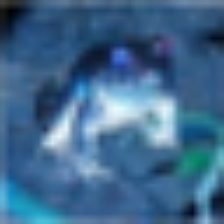

(50, 224, 224, 3)


In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

assert train_img.shape == (50, 32, 32, 3)
img = np.empty((50, 224, 224, 3), dtype='float16')
for (k, image) in enumerate(train_img):
    img[k] = cv2.resize(image, dsize=(224, 224))

# img = cv2.resize(x_train, (x_train.shape[0], 224, 224))
cv2_imshow(img[0])
# img = img.reshape(img.shape[0], img.shape[3], img.shape[1], img.shape[2])
print(img.shape)

In [ ]:
# load the model
model = VGG19()
model.summary()

574726144/574710816 [==============================] - 4s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [ ]:
# redefine model to get the output of flatten to last layer
ixs = [22, 23, 24,25]
outputs = [model.layers[i].output for i in ixs]
print(outputs)

[<KerasTensor: shape=(None, 25088) dtype=float32 (created by layer 'flatten')>, <KerasTensor: shape=(None, 4096) dtype=float32 (created by layer 'fc1')>, <KerasTensor: shape=(None, 4096) dtype=float32 (created by layer 'fc2')>, <KerasTensor: shape=(None, 1000) dtype=float32 (created by layer 'predictions')>]


In [ ]:
# calculation of  pertial derivative
import tensorflow as tf
import numpy as np

with tf.GradientTape() as tape:
  # Forward pass
  modified_model = Model(inputs=model.inputs, outputs=outputs)
  x = modified_model(img)
  img_adv = get_purturbed_image(img, modified_model)

  
  # heighest_prob = np.max(x[-1]) 

# print(heighest_prob)
# x = model.predict(img)
predictions = x[-1]
print(predictions.shape)
flatten_layer_output = x[0]
print(flatten_layer_output.shape)
# Calculate gradients with respect to every trainable variable
grad = tape.gradient(predictions, flatten_layer_output)
print(grad)


AttributeError: ignored

In [ ]:
# output of probabilities
print(predictions.shape)

(50, 1000)


In [ ]:
# get top 5 class name with probabilities
import keras
predicted_top_5 = keras.applications.vgg19.decode_predictions(predictions.numpy())

print(predicted_top_5)

49152/35363 [=========================================] - 0s 0us/step
[[('n03825788', 'nipple', 0.9041351), ('n03544143', 'hourglass', 0.019932017), ('n04152593', 'screen', 0.010086423), ('n03690938', 'lotion', 0.008332747), ('n04579145', 'whiskey_jug', 0.0041674958)], [('n03796401', 'moving_van', 0.6867204), ('n03961711', 'plate_rack', 0.060137294), ('n03207941', 'dishwasher', 0.030412223), ('n03764736', 'milk_can', 0.02449538), ('n04311004', 'steel_arch_bridge', 0.018423794)], [('n04428191', 'thresher', 0.49555123), ('n04008634', 'projectile', 0.07351186), ('n04153751', 'screw', 0.06832554), ('n03804744', 'nail', 0.06794346), ('n03000684', 'chain_saw', 0.022525927)], [('n01795545', 'black_grouse', 0.27466172), ('n02095889', 'Sealyham_terrier', 0.04681037), ('n02096437', 'Dandie_Dinmont', 0.039286315), ('n02422106', 'hartebeest', 0.03582016), ('n02085782', 'Japanese_spaniel', 0.033261638)], [('n03796401', 'moving_van', 0.5155112), ('n02690373', 'airliner', 0.062259812), ('n04357314', 

In [ ]:
# chaking if max is selecting the maximum value
len(np. max(grad, axis=1))

50

In [ ]:
# normalize the flatten gradients
grad= abs(grad)
print(grad.shape)
partial_derivative = grad/np.max(grad, axis=0)
print(partial_derivative)

(50, 25088)
tf.Tensor(
[[0.02063838 0.4650956  1.         ... 0.28626224 1.         1.        ]
 [0.46119332 0.6320537  0.18072389 ... 1.         0.12784609 0.0835707 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.1910755  0.17085321 0.09881671 ... 0.19842009 0.12930484 0.0508236 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]], shape=(50, 25088), dtype=float32)


In [ ]:
# neuron influence
influence = flatten_layer_output * partial_derivative

In [ ]:
influence

<tf.Tensor: shape=(50, 25088), dtype=float32, numpy=
array([[0.       , 0.6195335, 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 1.0019522,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ]], dtype=float32)>

In [ ]:
temp = influence[:,:512]
print(temp)

tf.Tensor(
[[0.        0.6195335 0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        3.8890371 0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 ...
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]], shape=(50, 512), dtype=float32)


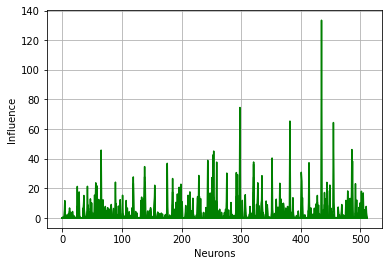

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

X = list(int(i) for i in range(0, 512))
# Initialize the lists for X and Y
    #plt.bar(X, Y, color='g')
plt.xlabel("Neurons")
plt.ylabel("Influence")
# plt.xlim(-0.5, 100)
# plt.ylim(-0.5, 100)
for i in range(50):
  plt.plot(X, influence[i][0:512], color = 'g')
    # plt.plot(X, Y, color = 'g')
plt.xticks(rotation = 0)
plt.grid()
    # plt.savefig('dataset_and_generated_graph/same_resolution/plot'+str(i)+'.png', dpi=500, bbox_inches='tight')
plt.show()

Generate perturbed images